In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house/house_price.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/house/house_price.csv")

In [4]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [7]:
df.shape

(13200, 7)

In [8]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [9]:
df.duplicated().sum()

1049

<Axes: >

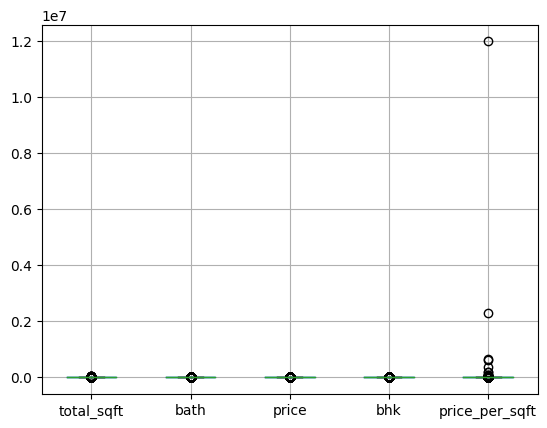

In [10]:
df.boxplot()

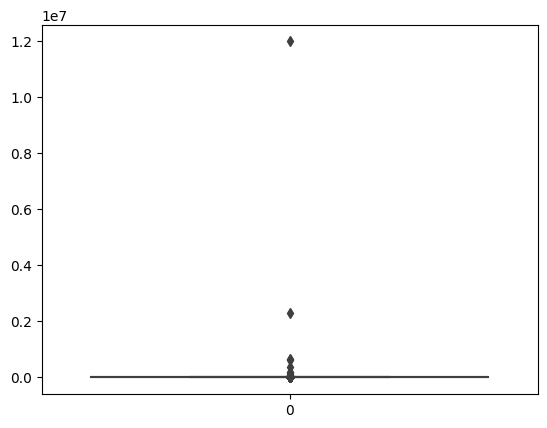

In [11]:
sns.boxplot(df['price_per_sqft'])
plt.show()

In [13]:
before_transformation = df['price_per_sqft'].skew()
print("Skew value before transformation:",before_transformation)

Skew value before transformation: 108.28105529705168


In [73]:
sample = np.log(df['price_per_sqft'])

In [74]:
after_transformation = df['price_per_sqft'].skew()
print(after_transformation)

1.3998626551353


# IQR method

In [17]:
Q3 = df['price_per_sqft'].quantile(.75)
Q1 = df['price_per_sqft'].quantile(.25)

IQR = Q3-Q1

lower_bound1 = Q1 - 1.5 * IQR
upper_bound1 = Q3 + 1.5 * IQR

df.loc[(df['price_per_sqft']<lower_bound1) | (df['price_per_sqft']>upper_bound1)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,9.808132
9,other,6 Bedroom,1020.0,6.0,370.0,6,10.498857
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,10.414303
69,other,3 Bedroom,500.0,3.0,100.0,3,9.903488
87,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,10.022825
...,...,...,...,...,...,...,...
13127,other,4 Bedroom,1200.0,5.0,325.0,4,10.206662
13141,other,3 Bedroom,2000.0,2.0,360.0,3,9.798127
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,10.691945
13186,other,4 Bedroom,1200.0,5.0,325.0,4,10.206662


In [18]:
new_df1 = df.loc[(df['price_per_sqft']>lower_bound1) & (df['price_per_sqft']<upper_bound1)]
print("before removing the outliers :",len(df))
print("after removing the outliers :",len(new_df1))
print("outliers :",len(df)-len(new_df1))

before removing the outliers : 13200
after removing the outliers : 12639
outliers : 561


## Capping Outliers

In [22]:
new_df1.loc[:, 'price_per_sqft'] = new_df1['price_per_sqft'].astype('float64')
new_df1.loc[new_df1['price_per_sqft']>upper_bound1,'price_per_sqft'] = upper_bound1
new_df1.loc[new_df1['price_per_sqft']<lower_bound1,'price_per_sqft'] = lower_bound1

<Axes: >

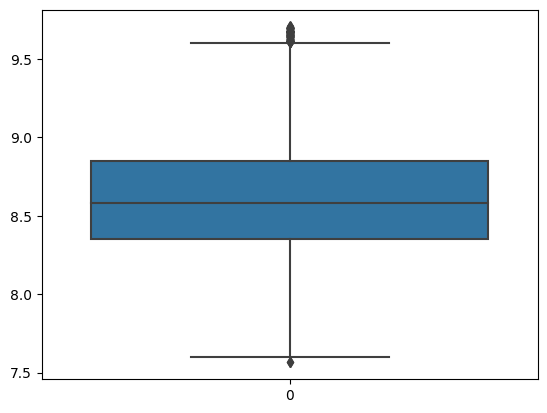

In [23]:
sns.boxplot(new_df1['price_per_sqft'])

# Outliers(Percentile method)

In [24]:
lower_percentile = df['price_per_sqft'].quantile(0.01)
upper_percentile = df['price_per_sqft'].quantile(0.99)

df.loc[(df['price_per_sqft']<lower_percentile) | (df['price_per_sqft']>upper_percentile)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,10.498857
20,Kengeri,1 BHK,600.0,1.0,15.0,1,7.824046
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,10.414303
130,Electronic City,2 BHK,880.0,1.0,16.5,2,7.536364
169,Attibele,1 BHK,450.0,1.0,11.0,1,7.801391
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,10.463103
13094,other,4 Bedroom,1200.0,5.0,325.0,4,10.206662
13127,other,4 Bedroom,1200.0,5.0,325.0,4,10.206662
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,10.691945


In [25]:
new_df2 = df.loc[(df['price_per_sqft']>lower_percentile) & (df['price_per_sqft']<upper_percentile)]
print("before removing the outliers :",len(df))
print("after removing the outliers :",len(new_df2))
print("outliers :",len(df)-len(new_df2))

before removing the outliers : 13200
after removing the outliers : 12932
outliers : 268


# Capping Outliers

In [27]:
new_df2.loc[:, 'price_per_sqft'] = new_df2['price_per_sqft'].astype('float64')
new_df2.loc[new_df2['price_per_sqft']>upper_percentile,'price_per_sqft'] = upper_percentile
new_df2.loc[new_df2['price_per_sqft']<lower_percentile,'price_per_sqft'] = lower_percentile

<Axes: >

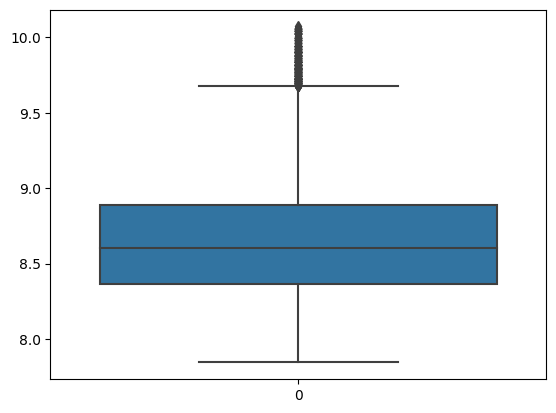

In [28]:
sns.boxplot(new_df2['price_per_sqft'])

# Z Score method

In [29]:
from scipy import stats


In [36]:
upper_limit2 = df['price_per_sqft'].mean()+3*df['price_per_sqft'].std()
lower_limit2 = df['price_per_sqft'].mean()-3*df['price_per_sqft'].std()
print("upper limit2:",upper_limit2)
print("lower limit2:",lower_limit2)


upper limit: 10.149224791869706
lower limit: 7.209055236215074


In [37]:
# finding the outlayers
df.loc[(df['price_per_sqft']>upper_limit2) | (df['price_per_sqft']<lower_limit2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,10.498857
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,10.414303
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,10.206662
345,other,3 Bedroom,11.0,3.0,74.0,3,13.419095
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,5.916202
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,10.463103
13094,other,4 Bedroom,1200.0,5.0,325.0,4,10.206662
13127,other,4 Bedroom,1200.0,5.0,325.0,4,10.206662
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,10.691945


In [41]:
new_df3 = df.loc[(df['price_per_sqft']<upper_limit2) & (df['price_per_sqft']>lower_limit2)]
print("before removing the outliers :",len(df))
print("after removing the outliers :",len(new_df3))
print("outliers :",len(df)-len(new_df3))

before removing the outliers : 13200
after removing the outliers : 13084
outliers : 116


# Capping Outliers

In [43]:
new_df3.loc[:, 'price_per_sqft'] = new_df3['price_per_sqft'].astype('float64')
new_df3.loc[new_df3['price_per_sqft']>upper_limit2,'price_per_sqft'] = upper_limit2
new_df3.loc[new_df3['price_per_sqft']<lower_limit2,'price_per_sqft'] = lower_limit2

<Axes: >

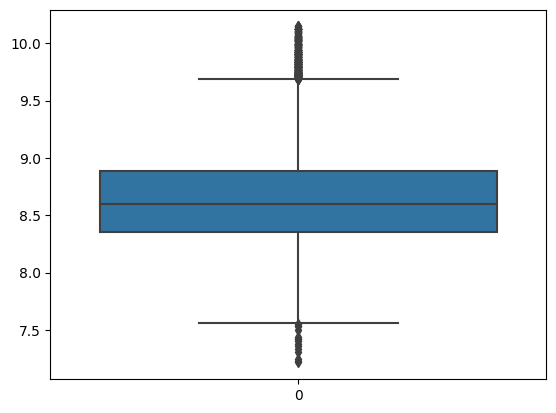

In [45]:
sns.boxplot(new_df3['price_per_sqft'])

## best to remove outliers

Text(0.5, 1.0, 'Original Data')

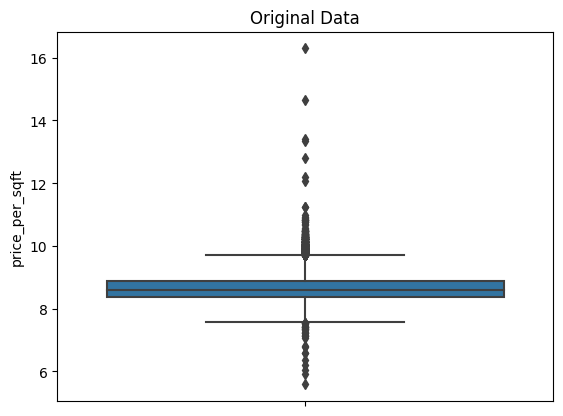

In [54]:
plt.subplot(1, 1,1)
sns.boxplot(y=df['price_per_sqft'])
plt.title('Original Data')

Text(0.5, 1.0, 'Data After IQR method')

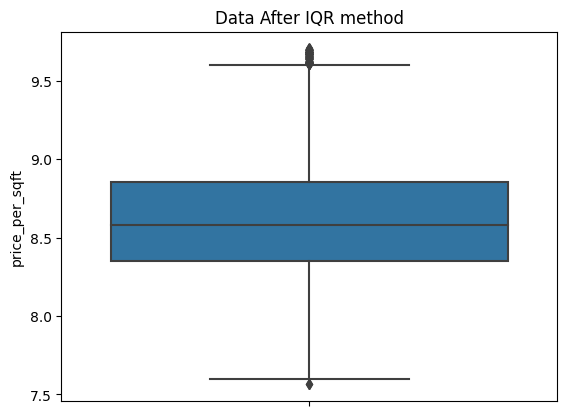

In [59]:
plt.subplot(1, 1, 1)
sns.boxplot(y=new_df1['price_per_sqft'])
plt.title('Data After IQR method')

Text(0.5, 1.0, 'Data After(Percentile method)')

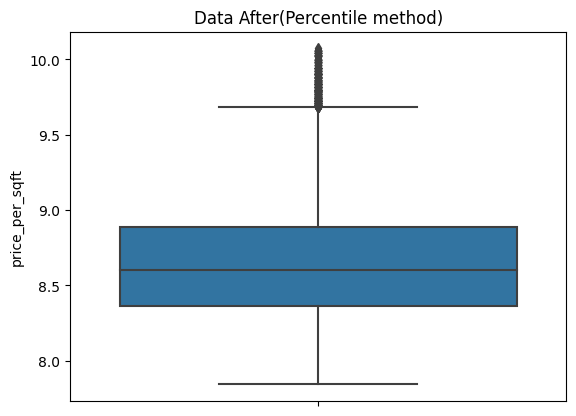

In [57]:
plt.subplot(1, 1, 1)
sns.boxplot(y=new_df2['price_per_sqft'])
plt.title('Data After(Percentile method)')

Text(0.5, 1.0, 'Data After Z Score method')

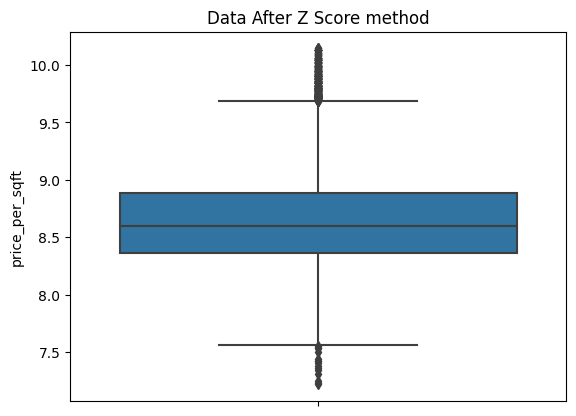

In [58]:
plt.subplot(1, 1, 1)
sns.boxplot(y=new_df3['price_per_sqft'])
plt.title('Data After Z Score method')

# before skewness

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


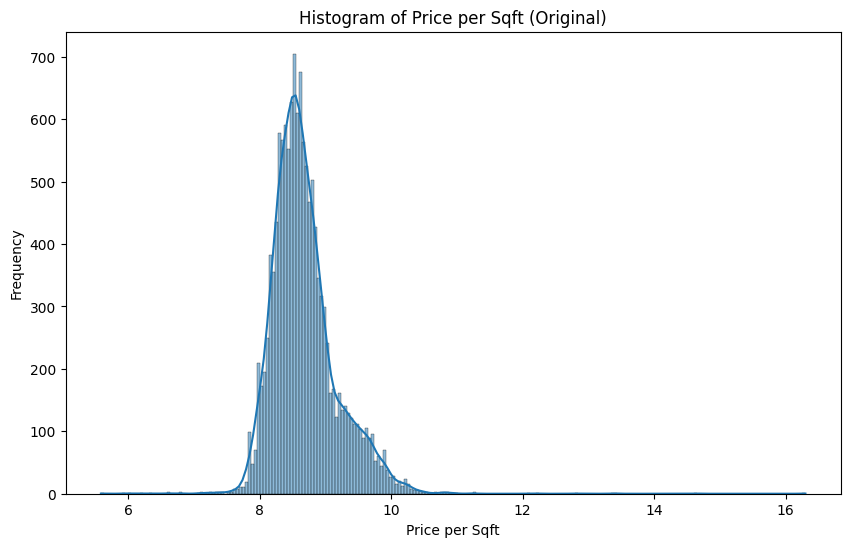

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Histogram of Price per Sqft (Original)')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

# After skewness

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


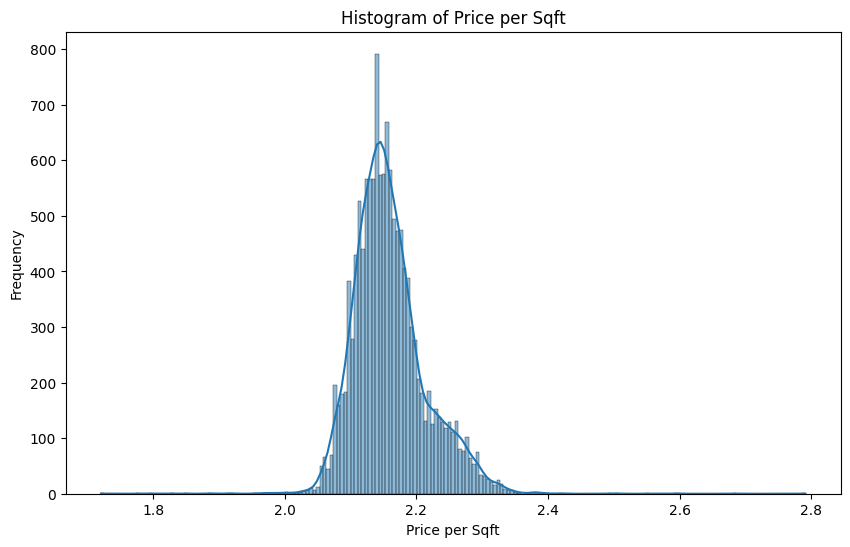

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(sample, kde=True)
plt.title('Histogram of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

## kurtosis transformation

In [78]:
from scipy.stats import kurtosis, norm

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Density')

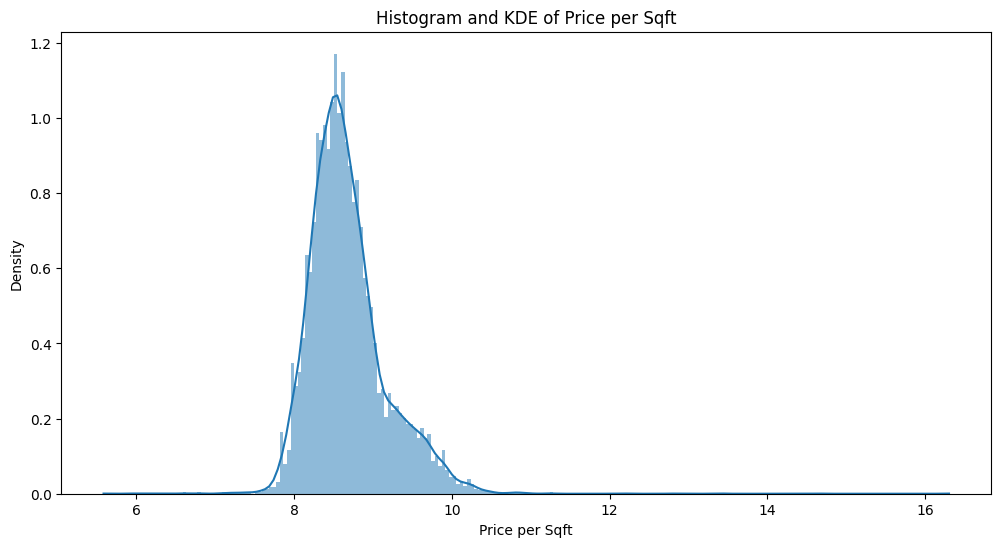

In [80]:
kurt = kurtosis(df['price_per_sqft'])

plt.figure(figsize=(12, 6))
sns.histplot(df['price_per_sqft'], kde=True, stat='density', linewidth=0)
plt.title('Histogram and KDE of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Density')

# Heatmap

In [82]:
numerical_df = df.select_dtypes(include=[np.number])

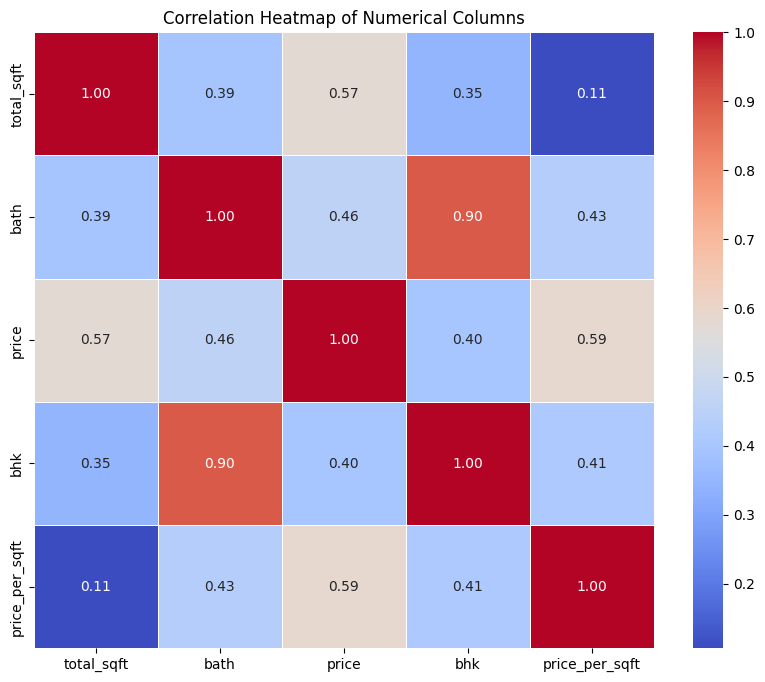

In [83]:
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Scatter plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

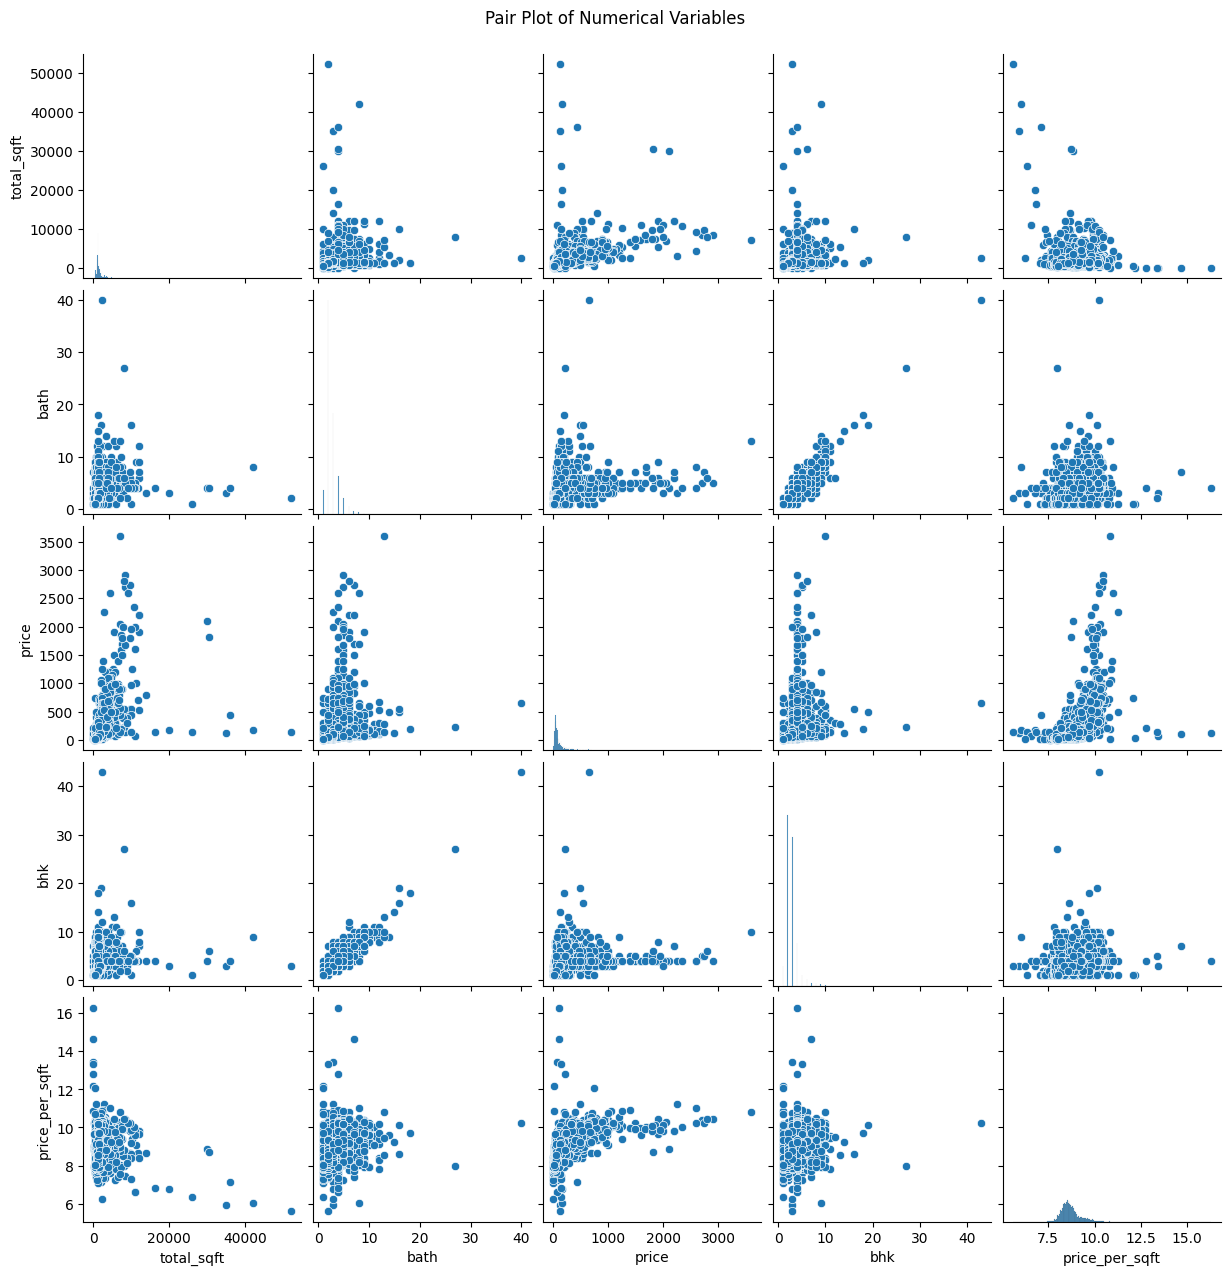

In [84]:
sns.pairplot(df)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()